In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
ibm_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
ibm_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
ibm_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
def ibm_Age_sampler(n):
    return np.random.choice(ibm_data.Age, n)

In [7]:
# Let's say you go out one day and randomly sample 10 people to measure.

seed(47)
daily_sampler = ibm_Age_sampler(100)

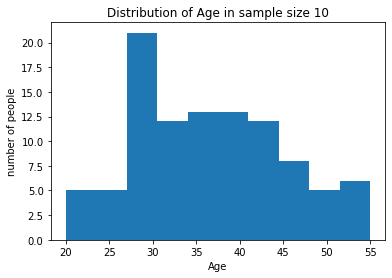

In [8]:
_ = plt.hist(daily_sampler, bins=10)
_ = plt.xlabel('Age')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of Age in sample size 10')

In [9]:
np.mean(daily_sampler)

36.44

- And if we went out and repeated this experiment?

In [10]:
daily_sample2 = ibm_Age_sampler(100)
np.mean(daily_sample2)

36.72

Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

In [11]:
seed(47)
# take your samples here
daily_sample_means = np.array([np.mean(ibm_Age_sampler(100)) for i in range(365)])

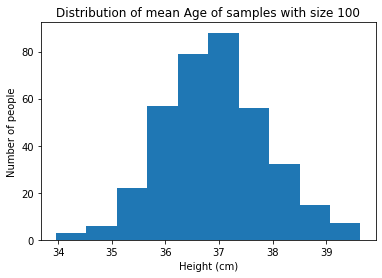

In [12]:
_ = plt.hist(daily_sample_means, bins=10)
_ = plt.xlabel('Height (cm)')
_ = plt.ylabel('Number of people')
_ = plt.title('Distribution of mean Age of samples with size 100')

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be  𝜎/𝑛⎯⎯√ , which, in this case, should be approximately 0.97.

In [13]:
daily_sample_means.std(ddof=1)

0.968312156763988

Remember, in this instance, we knew our population parameters, that the average age really is 36.923810 year old and the standard deviation is 9.135373	years old, and we see some of our daily estimates of the population mean were as low as around 28 years old and some as high as 46 years old.

Repeat the above year's worth of samples but for a sample size of 200. Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

In [14]:
seed(47)
# take your samples here
daily_sample_means = np.array([np.mean(ibm_Age_sampler(200)) for i in range(365)])

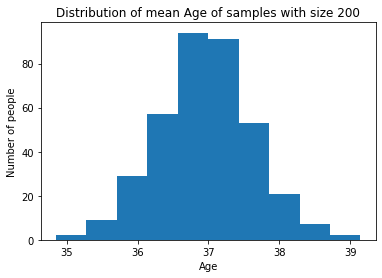

In [15]:
_ = plt.hist(daily_sample_means, bins=10)
_ = plt.xlabel('Age')
_ = plt.ylabel('Number of people')
_ = plt.title('Distribution of mean Age of samples with size 200')

What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

In [16]:
0.68 + ((1 - 0.68) / 2)

0.8400000000000001

Calculating this probability involved calculating the area under the pdf from the value of 1 and below. To put it another way, we need to integrate the pdf. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above. One way to do this is using look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

In [17]:
norm.cdf(1)

0.8413447460685429

In [18]:
norm(np.mean(ibm_data.Age), np.std(ibm_data.Age)).cdf(np.mean(ibm_data.Age) + np.std(ibm_data.Age))

0.841344746068543

__Q:__ Turning this question around. Let's say we randomly pick one person and that person is 48 years old. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

In [19]:
1 - norm(np.mean(ibm_data.Age), np.std(ibm_data.Age)).cdf(48)


0.11259103253471459

We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value. We have essentially just performed a z-test (albeit without having prespecified a threshold for our "level of surprise")!

We're about to come to a pinch, though here. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain.

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

In [20]:
seed(47)
# take your sample now
sample = ibm_Age_sampler(50)

In [21]:
mean_est = sample.mean()
mean_est

35.62

In [22]:
std_est = sample.std(ddof=1)
std_est

8.319855767980597

In [23]:
norm(mean_est, std_est).ppf([0.025, 0.975])

array([19.31338234, 51.92661766])

In [24]:
n = 50
norm(mean_est, std_est / np.sqrt(n)).ppf([0.025, 0.975])

array([33.31389601, 37.92610399])

Yes, the 95% confidence interval include the true population mean

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

In [25]:
critical_values = norm.ppf([0.025, 0.975])
critical_values * std_est / np.sqrt(n) + mean_est

array([33.31389601, 37.92610399])

This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

# Second part

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
ibm_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [27]:
ibm_data.shape

(1470, 35)

In [28]:
ibm_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
ibm_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


__Q:__ Plot the histogram of MonthlyIncome and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__Here is the plot below;

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022459A33948>]],
      dtype=object)

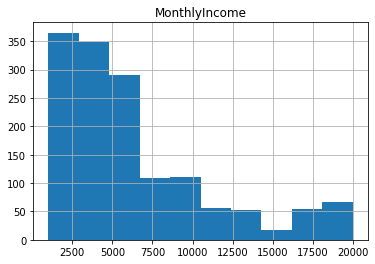

In [30]:
ibm_data.hist(column="MonthlyIncome")

In [31]:
mean = np.mean(ibm_data.MonthlyIncome)
mean

6502.931292517007

In [32]:
std = np.std(ibm_data.MonthlyIncome)
std

4706.355164823004

In [33]:
(mean - std, mean + std)

(1796.576127694003, 11209.286457340011)

Q: The IBM HR department is concerned that the actual average charge has fallen below 6000, threatening the company's employee attrition. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__Based on Central Limit Theorem, it is possible to contruct the appropriate confidence interval with the data using t-distribution.

__Q:__ Given the nature of the HR-Department's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

In [34]:
n = len(ibm_data.MonthlyIncome)
df = n - 1
critical_value = t(df).ppf(0.95)
ibm_data.MonthlyIncome.mean() - critical_value / np.sqrt(n) * std

6300.89599514115

__A:__ The administrator then should be concerned with the price difference among people with attrition and no attrition

The HR-Dapertment then wants to know whether people with attrition really are given a different amount of MonthlyIncome to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__The assumption is that two groups have equal value of standard deviation.

Q: Perform this hypothesis test both manually, using the above formula, and then using the appropriate function from scipy.stats (hint, you're looking for a function to perform a t-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [35]:
income_attrition = ibm_data.MonthlyIncome.loc[ibm_data.Attrition == "Yes"]

n0 = len(income_attrition)
s0 = income_attrition.std()
x0bar = income_attrition.mean()

In [36]:
income_no_attrition = ibm_data.MonthlyIncome.loc[ibm_data.Attrition == "No"]
n1 = len(income_no_attrition)
s1 = income_no_attrition.std()
x1bar = income_no_attrition.mean()

In [37]:
sp = np.sqrt(((n0 - 1) * s0 ** 2 + (n1 - 1) * s1 ** 2) / (n0 + n1 - 2))
t_score = (x0bar - x1bar) / (sp * np.sqrt(1 / n0 + 1 / n1))
t_score

-6.203935765608933

In [38]:
p_value = (t(n0 + n1 - 1).cdf(t_score)) * 2
p_value

7.146116830879181e-10

Since we have a p value of a number less than .05, we need to reject the null hypothesis. Employees with attrition has a different mean value of monthlyincome than employees with no-attrition.

In [39]:
from scipy.stats import ttest_ind
ttest_ind(income_attrition, income_no_attrition)

Ttest_indResult(statistic=-6.203935765608938, pvalue=7.14736398535381e-10)

Q: In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

In [40]:
ttest_ind(income_attrition, income_no_attrition, equal_var=False)

Ttest_indResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13)

# Third Part

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, I'll now use bootstrap inference to verify my calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of MonthIncome really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

In [41]:
np.random.seed(47)
N_rep = 10000
mean_replicate = np.empty(N_rep)
for i in range(N_rep):
    samples = np.random.choice(ibm_data['MonthlyIncome'], size = len(ibm_data['MonthlyIncome']))
    mean_replicate[i] = np.mean(samples)
    
mean, std =  np.mean(mean_replicate) , np.std(mean_replicate)
lower_bound = np.percentile(mean_replicate, 2.5)
print(lower_bound)


6260.879846938776


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 6261 here, which compares very well with the value 6301 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

Q: Calculate the 95% confidence interval for the difference between the standard deviations of attrition and non-attrition MonthlyIncome (attrition - non-attrition). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

In [42]:
attrition = ibm_data.MonthlyIncome.loc[ibm_data.Attrition == "Yes"]
no_attrition = ibm_data.MonthlyIncome.loc[ibm_data.Attrition == "No"]
attrition_count = len(attrition)
no_attrition_count = len(no_attrition)

In [43]:
np.random.seed(47)
std_diff_replicate = np.empty(N_rep)
for i in range(N_rep):
    attrition_samples = np.random.choice(attrition, attrition_count)
    no_attrition_samples = np.random.choice(no_attrition, no_attrition_count)
    std_diff_replicate[i] =np.std(no_attrition_samples) - np.std(attrition_samples) 
    
std_diff_mean, std_diff_std = np.mean(std_diff_replicate) , np.std(std_diff_replicate)
conf_int = np.percentile(std_diff_replicate , [2.5, 97.5])
print(conf_int)

[ 601.0877493  1814.61718572]


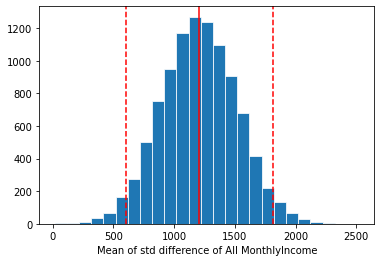

In [44]:
_ = plt.hist(std_diff_replicate,  edgecolor = 'white', linewidth = 0.75, bins = 25)
_ = plt.xlabel('Mean of std difference of All MonthlyIncome')
_ = plt.axvline(std_diff_mean, color='r')
_ = plt.axvline(conf_int[0], color='r', linestyle='--')
_ = plt.axvline(conf_int[1], color='r', linestyle='--')

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to  𝛼 , the associated confidence interval is our estimate of the interval within which we expect the true population value to be found  100×(1−𝛼) % of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of  𝛼 . The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our pre-specified  𝛼 , we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, we used the t-test to calculate the p-value for the observed difference between the means of attrition and no-attrition cases. We're now going to repeat this, this time using the bootstrap approach.

Q: Perform a bootstrapped hypothesis test at the 5% significance level ( 𝛼=0.05 ) to calculate the p-value of the observed difference between attrtion and no-attrition MonthlyIncome, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

In [45]:
mean_diff_observed =np.mean(no_attrition) - np.mean(attrition)
print(mean_diff_observed)

2045.646832363177


In [46]:
# Calculate with and without permutation with bootstrap
np.random.seed(47)
no_attrition_shifted = no_attrition - np.mean(no_attrition) + np.mean(attrition)

# Mean difference with permutation
def permutation_sample(data1, data2):
    data = np.random.permutation( np.concatenate((data1, data2)) )
    perm_sample_1 = data[:len(data1)]
    perm_sample_2 = data[len(data1):]
    return perm_sample_1, perm_sample_2

perm_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_attrition, perm_no_attrition = permutation_sample(attrition, no_attrition_shifted)
    perm_mean_replicates[i] = np.mean(perm_attrition) - np.mean(perm_no_attrition)
    
# Mean difference without permutation
mean_diff = np.empty(N_rep)
for i in range(N_rep):
    mean_diff[i] = np.mean(attrition_samples) - np.mean(np.random.choice(no_attrition_shifted, len(no_attrition_shifted)))

In [47]:
# Calculate the p value
p_val_permutation = np.sum(perm_mean_replicates >= mean_diff_observed)/len(perm_mean_replicates)
print(p_val_permutation)
p_val = np.sum(mean_diff >= mean_diff_observed)/len(mean_diff)
print(p_val)

0.0
0.0


- The p values are very small and less than 0.05 so we reject the null hypothesis.

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

_ = plt.hist(mean_diff, alpha = 0.5, bins = 20, color = 'g')
_ = plt.hist(perm_mean_replicates,  linewidth = 0.5, alpha = 0.25, bins = 20, color = 'm')
_ = plt.axvline(np.mean(perm_mean_replicates),color='g')
_ = plt.axvline(np.mean(mean_diff),color='r', linestyle='--')
_ = plt.axvline(np.mean(mean_diff_observed),color='b', linestyle=':')

Q: Compare your p-value above with that obtained using the t-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__
- As the p value is extremely small, it would be unwise to try to obtain a random difference that is as large as what we observed in real data; it may require significant number of iterations to achieve that goal.

In [48]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
from scipy.stats import gamma
import pymc3 as pm
# there has been some incompatibilty between theano and numpy, if you encounter
# an error with the latest packages from anaconda, then the included
# package-list-txt should allow you to create a conda environment with compatible
# packages.

In [49]:
attrition = ibm_data.MonthlyIncome.loc[ibm_data.Attrition == "Yes"]
no_attrition = ibm_data.MonthlyIncome.loc[ibm_data.Attrition == "No"]
attrition_count = len(attrition)
no_attrition_count = len(no_attrition)

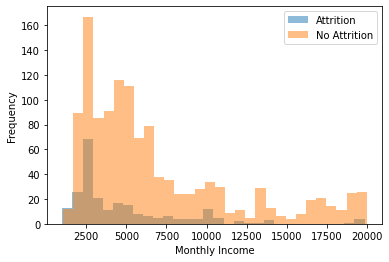

In [50]:
_ = plt.hist(attrition, bins=30, alpha=0.5, label='Attrition')
_ = plt.hist(no_attrition, bins=30, alpha=0.5, label='No Attrition')
_ = plt.xlabel('Monthly Income')
_ = plt.ylabel('Frequency')
_ = plt.legend()

We may suspect from the above that there is some sort of exponential-like distribution at play here. The MonthlyIncome that does have attrition seem most like this. The attrition claim with Monthly income may possibly be multimodal. The gamma distribution may be applicable and we could test this for the distribution of MonthlyIncome that has attrition first. 

### Initial parameter estimation

An initial guess for the gamma distribution's  𝛼  and  𝛽  parameters can be made as described [here](https://wiki.analytica.com/index.php?title=Gamma_distribution).

In [59]:
alpha_est = np.mean(attrition)**2 / np.var(attrition)
beta_est = np.var(attrition) / np.mean(attrition)
alpha_est, beta_est

(1.736709087238324, 2756.41606425665)

### Initial simulation

Let's draw the same number of random variates from this distribution and compare to our observed data.

In [60]:
seed(47)
attrition_model_rvs = gamma(alpha_est, scale=beta_est).rvs(attrition_count)

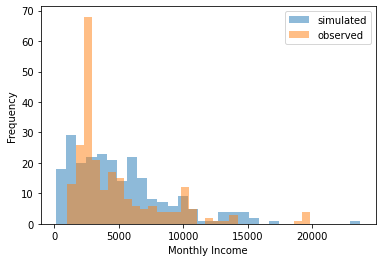

In [61]:
_ = plt.hist(attrition_model_rvs, bins=30, alpha=0.5, label='simulated')
_ = plt.hist(attrition, bins=30, alpha=0.5, label='observed')
_ = plt.xlabel('Monthly Income')
_ = plt.ylabel('Frequency')
_ = plt.legend()

Well it doesn't look too bad! We're not a million miles off. But can we do better? We have a plausible form for the distribution of Monthly Incomes and potential values for that distribution's parameters so we can already draw random variates from that distribution to perform simulations. But we don't know if we have a best estimate for the population parameters, and we also only have a single estimate each for  𝛼  and  𝛽 ; we aren't capturing our uncertainty in their values. Can we take a Bayesian inference approach to estimate the parameters?

### Creating a PyMC3 model

In [62]:
# PyMC3 Gamma seems to use rate = 1/beta
rate_est = 1/beta_est
# Initial parameter estimates we'll use below
alpha_est, rate_est

(1.736709087238324, 0.0003627899332641859)

__Q:__ We are now going to create your own PyMC3 model!
1. Use an [exponential](https://docs.pymc.io/api/distributions/continuous.html#pymc3.distributions.continuous.Exponential) prior for alpha. Call this stochastic variable `alpha_`.
2. Similarly, use an exponential prior for the rate ([$1/\beta$](https://wiki.analytica.com/index.php?title=Gamma_distribution)) parameter in PyMC3's [Gamma](https://docs.pymc.io/api/distributions/continuous.html#pymc3.distributions.continuous.Gamma). Call this stochastic variable `rate_` (but it will be supplied as `pm.Gamma`'s `beta` parameter). Hint: to set up a prior with an exponential distribution for $x$ where you have an initial estimate for $x$ of $x_0$, use a scale parameter of $1/x_0$.
5. Create your Gamma distribution with your `alpha_` and `rate_` stochastic variables and the observed data.
6. Perform 10000 draws.

Hint: We may find it helpful to work backwards. Start with your `pm.Gamma`, and note the required stochastic variables `alpha` and `beta`. Then, before that, you need to create those stochastic variables using `pm.Exponential` and the correct parameters.

In [63]:
with pm.Model() as model:
    
    alpha_ = pm.Exponential('alpha', alpha_est)
    rate_ = pm.Exponential('rate',rate_est)
    
    y_obs = pm.Gamma('y_obs', alpha=alpha_, beta=1/rate_, observed=attrition)
    trace = pm.sample(draws=10000,tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rate, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 44000/44000 [00:49<00:00, 896.12draws/s] 


Q: Explore your posteriors for  𝛼  and  𝛽  (from the trace).

Calculate the 95% credible interval for  𝛼  and  𝛽 .
Plot your posterior values of  𝛼  and  𝛽  (both line plots and histograms).
Mark your CIs on the histograms.
Do they look okay? What would bad plots look like?

In [64]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,2.345,0.204,1.966,2.730,0.002,0.001,10327.0,10287.0,10311.0,10592.0,1.0
rate,2061.092,201.487,1686.251,2433.297,1.990,1.413,10252.0,10171.0,10283.0,10453.0,1.0


In [65]:
alpha = pd.DataFrame({'v':trace['alpha']})
beta = pd.DataFrame({'v':trace['rate']})

In [66]:
alpha.v.quantile(0.025),alpha.v.quantile(0.975)

(1.9638575373945097, 2.76007433882054)

In [67]:
beta.v.quantile(0.025),beta.v.quantile(0.975)

(1703.8973298295564, 2492.8105606931713)

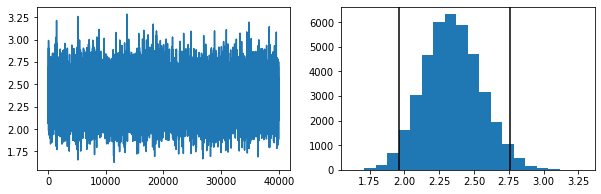

In [68]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax1.plot(alpha.v)
ax2 = fig.add_subplot(122)
ax2.hist(alpha.v,bins=20)
plt.axvline(alpha.v.quantile(0.025),color='k')
plt.axvline(alpha.v.quantile(0.975),color='k')

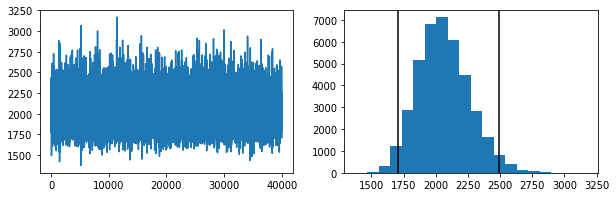

In [69]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax1.plot(beta.v)
ax2 = fig.add_subplot(122)
ax2.hist(beta.v,bins=20)
plt.axvline(beta.v.quantile(0.025),color='k')
plt.axvline(beta.v.quantile(0.975),color='k')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224624AAD48>,
      dtype=object)

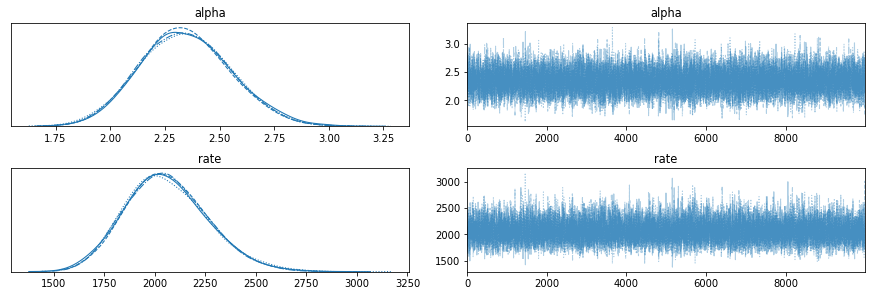

In [70]:
pm.traceplot(trace)


Q: Take your best shot at a new simulated sequence of medical charges using scipy.stat's gamma distribution. Don't forget the difference between functions that take  𝛽  and functions that use  1/𝛽  for the scale parameter. Simulate a data set the same size as the number of observations in the data and overlay the two histograms (simulated and observed).

In [71]:
seed(47)
best_shot_simulated = gamma(alpha.mean(), scale=beta.mean()).rvs(attrition_count)

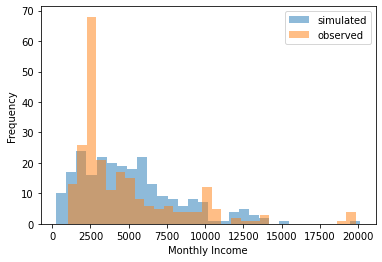

In [74]:
_ = plt.hist(best_shot_simulated, bins=30, alpha=0.5, label='simulated')
_ = plt.hist(attrition, bins=30, alpha=0.5, label='observed')
_ = plt.xlabel('Monthly Income')
_ = plt.ylabel('Frequency')
_ = plt.legend()

## Summary

In this exercise, we have postulated a distribution to describe the individual monthly Income for attrition cases. This distribution has two required parameters, which we do not know, but we used PyMC3 to perform Bayesian inference to find our level of "belief" in a range of values for them. We then used the average parameter values to create one simulated data set of the same size as the original, but the distribution of our posteriors for these parameters will allow us to perform simulations of any sample size we desire and for a range of scenarios of different  𝛼  and  𝛽 . This could be a powerful tool to model different financial conditions for the hospital.

Starting think Bayesian and starting to get to grips with something like PyMC3 is no easy task.

it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having a basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.)

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.